# Física Computacional
## Transformada de Fourier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
%matplotlib inline

**1. Transformada de Fourier**

\begin{equation}
c_k = \sum_{n=0}^{N-1}y_n exp\left(-i\frac{2\pi kn}{N}\right)
\end{equation}

In [ ]:
#implementar a função (entrada deve ser um array y)
def dft(y):
    N = len(y)
    n = np.arange(N)
    c = np.zeros(N//2+1,complex)
    for k in range(c.size):
        c[k] = (y*np.exp(-2j*np.pi*k*n/N)).sum()
    return c

In [ ]:
#abrir e plota arquivo de dados
y = np.loadtxt('pitch.txt')
y[:5]

array([0.455179 , 0.345091 , 0.0404799, 0.152787 , 0.424501 ])

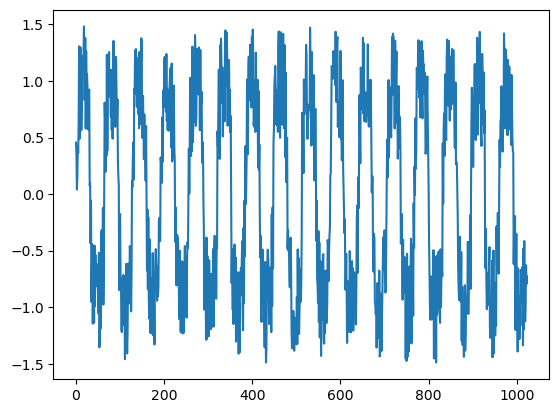

In [ ]:
plt.plot(y)

(0.0, 300.0)

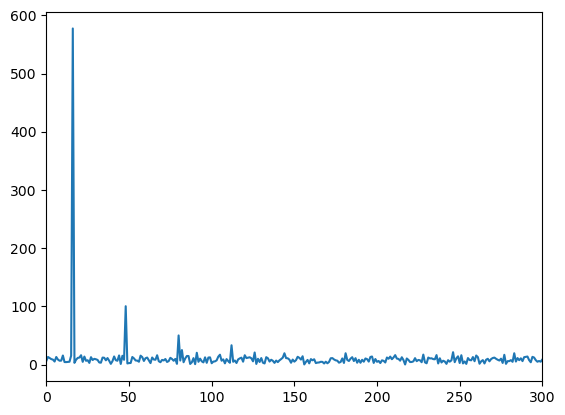

In [ ]:
#Transformada de Fourier do sinal
ck = dft(y)
plt.plot(np.absolute(ck))
plt.xlim(0,300)

**Exemplo: batimento**

(0.0, 0.4)

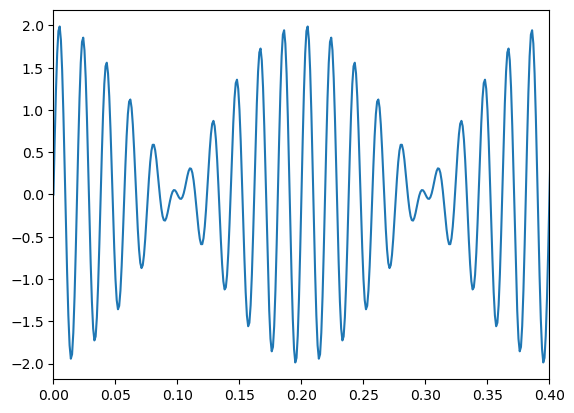

In [ ]:
#Duas ondas senoidais de frequências próximas
fq1 = 50  #Hz
fq2 = 55
fs = 1000 #44100 #fs samples por segundo
seconds = 1.0
t = np.linspace(0, seconds, int(fs*seconds),endpoint=False)
wave1 = np.sin(fq1 * t * 2 * np.pi)
wave2 = np.sin(fq2 * t * 2 *np.pi)
bat = wave1 + wave2
plt.plot(t,bat)
plt.xlim(0,0.4)

In [ ]:
#sonificacao
# Converter para to 16-bit data
#audio  = np.int16((bat / bat.max()) * 32767)
#write('test.wav',fs,audio)

(45.0, 65.0)

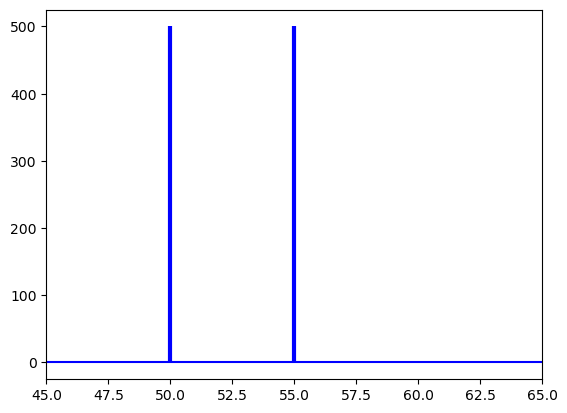

In [ ]:
ck = dft(bat)
#frequência
N = bat.size
T = N/fs
k = np.arange(N)
freq = k/T
markerline, stemlines, baseline = plt.stem(freq[:N//2+1], np.absolute(ck), markerfmt=" ", basefmt="b")
plt.setp(stemlines, color='b', linewidth=3)
plt.xlim(45,65)

**2. Transformada Rápida de Fourier (FFT)**

O Numpy tem as funções np.fft.fft e np.fft.rfft (real) que implementam a FFT. As transformações inversas são np.fft.ifft e np.fft.irfft. As frequências podem ser calculadas com np.fft.fftfreq e np.fft.rfftfreq.

**Exemplo 1: filtragem de frequência**

In [8]:
#função para gerar sinais
def generate_sine_wave(freq, taxa, tempo):
    x = np.linspace(0, tempo, taxa*tempo)
    ft = x * freq
    y = np.sin((2 * np.pi) * ft)
    return y

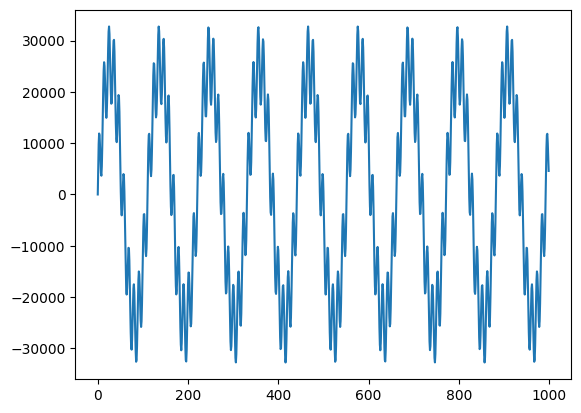

In [9]:
taxa = 44100  #Hz
tempo = 5     #segundos
som   = generate_sine_wave(400, taxa, tempo)
ruido = 0.3*generate_sine_wave(4000, taxa, tempo)
mixed = som + ruido
normalizado = np.int16((mixed / mixed.max()) * 32767)
plt.plot(normalizado[:1000])

In [ ]:
#sonificacao
write('som_original.wav',taxa,normalizado)

220500
110251


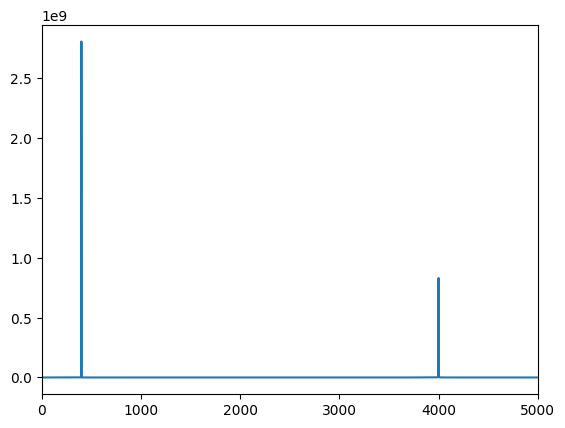

In [10]:
#FFT com np.rfft
N = som.size
ak = np.fft.rfft(normalizado)
xf = np.fft.rfftfreq(N, 1/taxa)
plt.plot(xf,np.absolute(ak))
plt.xlim(0,5000)
print(N)
print(ak.size)

Para filtra altas freqências,  vamos usar operadores de comparaçã com NumPy.

In [ ]:
#Relembrando
a = np.array([3,5,8,9,12,25])
b = 2*np.ones(6)
c = a < 12  #retorna um array boleano
print(c)

[ True  True  True  True False False]


In [ ]:
print(b*c)

[2. 2. 2. 2. 0. 0.]


(0.0, 5000.0)

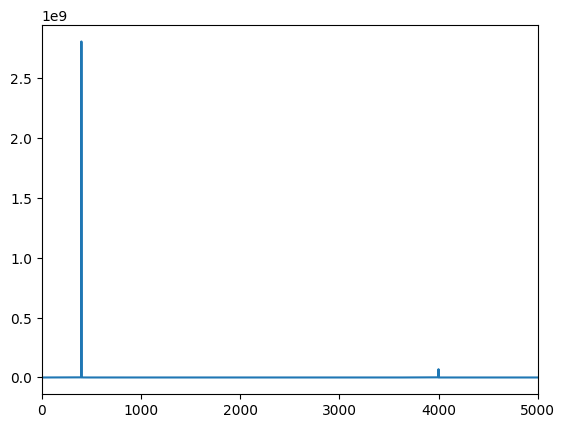

In [11]:
#Filtrando do sinal:
ak_filt = ak*(xf < 4000)
plt.plot(xf,np.absolute(ak_filt))
plt.xlim(0,5000)

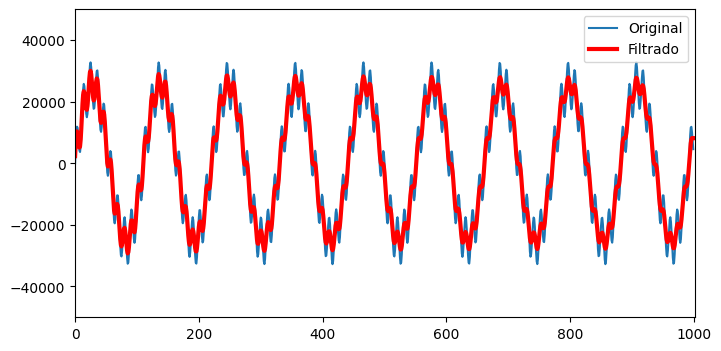

In [12]:
#Transformada inversa
fig,ax = plt.subplots(figsize=(8,4))
sinal_filt = np.fft.irfft(ak_filt)
ax.plot(normalizado[:1000],label='Original')
ax.plot(sinal_filt[:1000],c='red',lw=3,label='Filtrado')
ax.set_xlim(0,1002)
ax.set_ylim(-50000,50000)
ax.legend()

In [ ]:
sinal_som = np.int16(sinal_filt)

In [ ]:
#sonificar sinal filtrado
write('som_filtrado.wav',taxa,sinal_som)